<a href="https://www.kaggle.com/code/longhaojia/chapter3-5-classification-training-and-svms?scriptVersionId=198720262" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## 读书笔记(机器学习实战) | 第3-5章 分类、训练模型和支持向量机

> -   书籍简介: 本书通过使用具体的例子、最少的理论和两个可用于生产的 Python 框架——Scikit-Learn 和 TensorFlow——作者 Aurélien Géron 帮助你直观地了解构建智能系统的概念和工具。你将学习一系列技术，从简单的线性回归开始，逐渐深入到深度神经网络。每章都有练习来帮助你应用所学的知识，你只需要有编程经验就可以开始。
>
> -   代码示例: https://github.com/ageron/handson-ml2

# ![研究方向_4](https://jialh.oss-cn-shanghai.aliyuncs.com/img2/研究方向_4.jpg)

#### 第3章 支持向量机
- 第1章提到，最常见的有监督学习任务包括回归任务(预测值)和分类任务(预测类)。
- 第2章探讨了一个回归任务——预测住房价格，用到了线性回归、决策树以及随机森林等各种算法(我们将会在后续章节中进一步讲解这些算法)。本章中我们将把注意力转向分类系统。

#### 3.1 MINIST
本章将使用MNIST数据集，这是一组由美国高中生和人口调查局员工手写的70 000个数字的图片。每张图片都用其代表的数字标记。这个数据集被广为使用，因此也被称作是机器学习领域的“Hello World”：但凡有人想到了一个新的分类算法，都会想看看在MNIST上的执行结果。因此只要是学习机器学习的人，早晚都要面对MNIST。<br>
Scikit-Learn提供了许多助手功能来帮助你下载流行的数据集。MNIST也是其中之一。下面是获取MNIST数据集的代码：

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys() 

/opt/conda/lib/python3.10/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

#### 3.2 训练二元分类器
- 可以用Scikit-Learn的SGDClassifier类，实现一个二分类器，区分5和非5。

#### 3.3 性能度量
- 使用交叉验证度量准确率: `from sklearn.model_selection import cross_val_score`
- 使用混淆矩阵度量准确率，混淆矩阵能够很方便的计算准确度、精确度、召回率和F1等指标。
```
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix 
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
confusion_matrix(y_train_5, y_train_pred)
```
- Scikit-Learn中精确度和召回率的计算。
```
from sklearn.metrics import precision_score, recall_score 
from sklearn.metrics import f1_score 
```
- 精度/召回率权衡可以用AUROC和PR曲线来度量。
```
from sklearn.metrics import precision_recall_curve 
from sklearn.metrics import roc_curve 
```

#### 3.4 多类分类器
二元分类器在两个类中区分，而多类分类器(也称为多项分类器)可以区分两个以上的类。多分类器通常有两种实现策略:
- <b>一对剩余(OvR)策略</b>: 训练10个二元分类器，每个数字一个(0-检测器、1-检测器、2-检测器，以此类推)。然后，当你需要对一张图片进行检测分类时，获取每个分类器的决策分数，哪个分类器给分最高，就将其分为哪个类。
- 一对一(OvO)策略: 为每一对数字训练一个二元分类器, 一个用于区分0和1，一个区分0和2，一个区分1和2，以此类推。
- Scikit-Learn中一对剩余(OvR)策略的实现: `from sklearn.multiclass import OneVsRestClassifier`。
- Scikit-Learn中一对一(OvO)策略的实现: `from sklearn.multiclass import OneVsOneClassifier`

#### 3.5 误差分析
- 在这里，假设你已经找到了一个有潜力的模型，现在你希望找到一些方法对其进一步改进。方法之一就是分析其错误类型。

#### 3.6 多标签分类
- 到目前为止，每个实例都只会被分在一个类里。而在某些情况下，你希望分类器为每个实例输出多个类。比如人脸识别分类器。

#### 3.7 多输出分类
- 多输出-多类分类(或简单地称为多输出分类)： 多标签分类的泛化，其标签也可以是多类的(比如它可以有两个以上可能的值)。
- 图片去噪: 分类器的输出是多个标签(一个像素点一个标签)，每个标签可以有多个值(像素强度范围为0到225)。

### 第4章 训练模型
本章我们将从最简单的模型之一——线性回归模型，开始介绍两种非常不同的训练模型的方法：
- 通过“闭式(closed-form”)”方程，直接计算出最拟合训练集的模型参数(也就是使训练集上的成本函数最小化的模型参数)。
- 使用迭代优化的方法，即梯度下降(Gradient Descent,GD)，逐渐调整模型参数直至训练集上的成本函数调至最低，最终趋同于第一种方法计算出来的模型参数。我们还会研究几个梯度下降的变体，包括<font color="red">批量梯度下降(Batch GD)、小批量梯度下降(Mini-batch GD)以及随机梯度下降(Stochastic GD)。</font>等我们进入到第二部分神经网络的学习时，会频繁地使用这几个的变体。

接着我们将会进入<font color="red">多项式回归(Polynomial Regression)</font>的讨论，这是一个更为复杂的模型，更适合非线性数据集。由于该模型的参数比线性模型更多，因此更容易造成对训练数据过拟合，我们将使用学习曲线来分辨这种情况是否发生。然后，再介绍几种正则化技巧，降低过拟合训练数据的风险。

最后，我们将学习两种经常用于分类任务的模型：<font color="red">Logistic回归和Softmax回归。</font>

#### 4.1 线性回归
- 线性模型就是对输入特征加权求和，再加上一个我们称为偏置项(也称为截距项)的常数，以此进行预测。
- 度量模型对训练数据的拟合程度: 均方根误差(Root Mean Square Error, RMSE)和均方误差(Mean Square Error, MSE)。
- 标准方程: 为了得到使成本函数最小的θ值，可以通过标准方程进行闭式求解。标准方程为: $\hat \theta = (X^TX)^{-1}X^Ty$, 其中$\hat \theta$是使损失函数最小的$\theta$值，y是包含$y^{(1)}$到$y^{(m)}$的目标值向量。
- <font color="red">如何理解标准方程:</font> 对损失函数$J(\theta_0, \theta_1,...,\theta_m)=\frac{1}{2m}\sum_{i=1}^m(h_{\theta}(x^{(i)})-y^{(i)})$求导，极值点出梯度为0。https://blog.csdn.net/qq_41977984/article/details/120541621

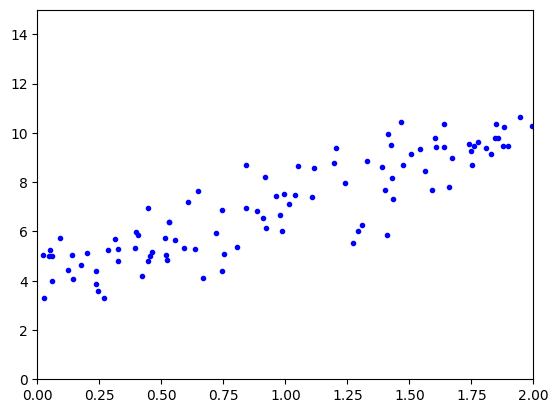

In [2]:
# 我们生成一些线性数据来测试标准方程。
import numpy as np 
import matplotlib.pyplot as plt 

X = 2 * np.random.rand(100, 1) 
y = 4 + 3 * X + np.random.randn(100, 1) 

plt.plot(X, y, "b.") 
plt.axis([0, 2, 0, 15]) 
plt.show() 

In [3]:
# 使用NumPy的线性代数模块(np.linalg)中的inv()函数来对矩阵求逆，并用dot()方法计算矩阵的内积：
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance 
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) 
theta_best

array([[4.09392311],
       [3.02497618]])

我们期待的是$\theta_0=4$，$\theta_1=3$得到的是$\theta_0=4.215$，$\theta_1=2.770$。非常 接近，噪声的存在使其不可能完全还原为原本的函数。<br>
接下来可以用$\hat \theta$来进行预测:

In [4]:
X_new = np.array([[0], [2]]) 
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance 
y_predict = X_new_b.dot(theta_best) 
y_predict 

array([[ 4.09392311],
       [10.14387548]])

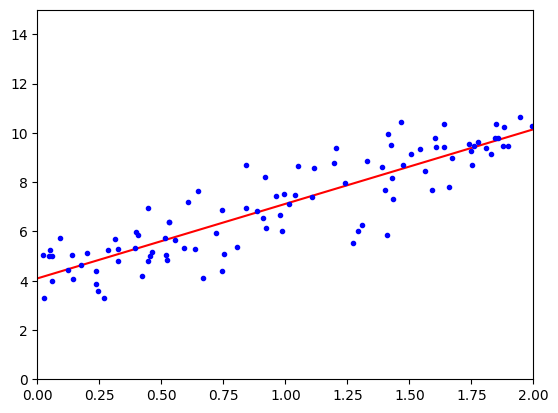

In [5]:
# 绘制模型的预测结果
import matplotlib.pyplot as plt 
plt.plot(X_new, y_predict, "r-") 
plt.plot(X, y, "b.") 
plt.axis([0, 2, 0, 15]) 
plt.show() 

使用Scikit-Learn执行线性回归很简单:

In [6]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_
lin_reg.predict(X_new)

array([[ 4.09392311],
       [10.14387548]])

- LinearRegression类基于`scipy.linalg.lstsq()`函数（名称代表“最小二乘”）, 此函数计算$\hat \theta = X^+y$，其中$X^+$是$X$的伪逆（具体来说是Moore-Penrose逆）。
- 伪逆本身是使用被称为奇异值分解（Singular Value Decomposition，SVD）的标准矩阵分解技术来计算的，可以将训练集矩阵X分解为三个矩阵UΣVT的乘积（请参阅`numpy.linalg.svd()`）。
- 伪逆的计算公式为$X^+=VΣ^+U^T$。为了计算矩阵$Σ+$，该算法取$Σ$并将所有小于一个小阈值的值设置为零，然后将所有非零值替换成它们的倒数，最后把结果矩阵转置。
- <font color="red">如何计算逆逆矩阵？</font> 待定系数法，伴随矩阵求逆矩阵和初等变换求逆矩阵。https://aistudio.csdn.net/62e38a74cd38997446774c8f.html
- <font color="red">什么是伪逆？</font> 伪逆矩阵是逆矩阵的广义形式。由于奇异矩阵或非方阵的矩阵不存在逆矩阵，python中`scipy.linalg.pinv(A)`函数返回一个与$A$的转置矩阵$A^T$ 同型的矩阵$X$，并且满足：$AXA=A$,$XAX=X$.此时，称矩阵$X$为矩阵$A$的伪逆，也称为广义逆矩阵。`pinv(A)`具有`inv(A)`的部分特性，但不与`inv(A)`完全等同。如果$A$为非奇异方阵，`pinv(A)=inv(A)`，但却会耗费大量的计算时间，相比较而言，`inv(A)`花费更少的时间。https://blog.csdn.net/u014260892/article/details/38581175
- <font color="red">什么是奇异值分解？</font>  SVD也是对矩阵进行分解，但是和特征分解不同，SVD并不要求要分解的矩阵为方阵。假设我们的矩阵$A$是一个$m×n$的矩阵，那么我们定义矩阵A的SVD为：$A = U\Sigma V^T$。其中$U$是一个$m×m$的矩阵，$Σ$是一个$m×n$的矩阵，除了主对角线上的元素以外全为0，主对角线上的每个元素都称为奇异值，$V$是一个$n×n$
的矩阵。$U$和$V$都是酉矩阵，即满足$U^TU=I$,$V^TV=I$。https://www.cnblogs.com/pinard/p/6251584.html

#### 4.2 梯度下降
- 梯度下降的做法: 通过测量参数向量`θ`相关的误差函数的局部梯度，并不断沿着降低梯度的方向调整，直到梯度降为0，到达最小值！
- 梯度下降的两个主要挑战: (1) 收敛到一个局部极小值，而不是全局最小值。（2）某些情况下需要穿过漫长的平台期，如果停得太早，将永远达不到全局最小。
- 线性回归模型的MSE成本函数恰好是个凸函数，这意味着连接曲线上任意两点的线段永远不会跟曲线相交。因此即便是乱走，梯度下降都可以趋近到全局最小值。
- 成本函数虽然是碗状的，但如果不同特征的尺寸差别巨大，那它可能是一个非常细长的碗。
- <font color="red">批量梯度下降: </font> 在更新参数时都使用<font color="red">所有的</font>样本来进行更新。https://blog.csdn.net/xiaotao_1/article/details/81031633
- <font color="red">随机梯度下降: </font> 在更新参数时都使用<font color="red">一个</font>样本来进行更新。每一次更新参数都用一个样本，更新很多次。
- <font color="red">小批量梯度下降: </font> 在更新每一参数时都使用<font color="red">一部分</font>样本来进行更新。为了克服上面两种方法的缺点，又同时兼顾两种方法的优点。
- **不同梯度下降方法的适用范围**: 如果样本量比较小，采用批量梯度下降算法。如果样本太大，或者在线算法，使用随机梯度下降算法。在实际的一般情况下，采用小批量梯度下降算法。

#### 4.3 多项式回归
- 我们使用Scikit-Learn的`PolynomialFeatures`类来转换训练数据，将训练集中每个特征的平方（二次多项式）添加为新特征。

#### 4.4 学习曲线
- 学习曲线: 这个曲线绘制的是模型在训练集和验证集上关于训练集大小（或训练迭代）的性能函数。要生成这个曲线，只需要在不同大小的训练子集上多次训练模型即可。
- 通过观察学习曲线来判断欠拟合: 如果你的模型欠拟合训练数据，添加更多训练示例将无济于事。你需要使用更复杂的模型或提供更好的特征。
- 过拟合: 模型在训练数据上的性能要比在验证数据上的性能好得多。如果你使用更大的训练集，则两条曲线会继续接近。
- 模型的泛化误差可以表示为三个非常不同的误差之和：包括偏差、方差和不可避免误差。

#### 4.5 正则化线性模型
- 正如我们在第1章和第2章中看到的那样，减少过拟合的一个好方法是对模型进行正则化（即约束模型）：它拥有的自由度越少，则过拟合数据的难度就越大。正则化多项式模型的一种简单方法是减少多项式的次数。
- 对于线性模型，正则化通常是通过约束模型的权重来实现的。现在，我们看一下<font color="red">岭回归、Lasso回归和弹性网络</font>，它们实现了三种限制权重的方法。
- **岭回归（也称为Tikhonov正则化）**： $J(\theta)=MSE(\theta) + \alpha \frac{1}{2}\sum_{i=1}^n(\theta_i^2)$
- **最小绝对收缩和选择算子回归（简称Lasso回归）**： $J_{(\theta)} = MSE(\theta) + \alpha \sum_{i=1}^{n}|\theta_i|$。
- **弹性网络回归**: $J(\theta) = MSE(\theta) + r\alpha \sum_{i=1}^n|\theta_i| + \frac{1-r}{2}\alpha \sum_{i=1}^2\theta_i^2$
- 当r=0时，弹性网络等效于岭回归，而当r=1时，弹性网络等效于Lasso回归。
- 提前停止: 在验证误差达到最小值时停止训练。经过一轮一轮的训练，算法不断地学习，训练集上的预测误差（RMSE）自然不断下降，同样其在验证集上的预测误差也随之下降。但是，一段时间之后，验证误差停止下降反而开始回升。这说明模型开始过拟合训练数据。
- “美丽的免费午餐(beautiful free lunch)”: [Understanding Early Stopping: A Key to Preventing Overfitting in Machine Learning](https://medium.com/@juanc.olamendy/understanding-early-stopping-a-key-to-preventing-overfitting-in-machine-learning-17554fc321ff)

#### 4.6 逻辑回归
- 正如第1章中提到过的，<font color="red">一些回归算法也可用于分类（反之亦然）</font>。逻辑回归（Logistic回归，也称为Logit回归）被广泛用于估算一个实例属于某个特定类别的概率。

### 第5章 支持向量机
支持向量机（Support Vector Machine，SVM）是一个功能强大并且全面的机器学习模型，它能够执行线性或非线性分类、回归，甚至是异常值检测任务。它是机器学习领域最受欢迎的模型之一，任何对机器学习感兴趣的人都应该在工具箱中配备一个。SVM特别适用于中小型复杂数据集的分类。<br>
本章将会介绍不同SVM的核心概念、如何使用它们以及它们的工作原理。

#### 5.1 线性SVM分类
- SVM分类器视为在类之间拟合可能的最宽的街道（平行的虚线所示）。因此这也叫作大间隔分类。
- 在“街道以外”的地方增加更多训练实例不会对决策边产生影响，也就是说它完全由位于街道边缘的实例所决定（或者称之为“支持”）。这些实例被称为支持向量（在图5-1中已圈出）。
- 硬间隔分类有两个主要问题: (1)它只在数据是线性可分离的时候才有效；(2)它对异常值非常敏感。
- **软间隔分类**: 尽可能在保持街道宽阔和限制间隔违例（即位于街道之上，甚至在错误的一边的实例）之间找到良好的平衡。
- 以下Scikit-Learn代码可加载鸢尾花数据集，缩放特征，然后训练线性SVM模型来检测维吉尼亚鸢尾花：

In [7]:
import numpy as np 
from sklearn import datasets 
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler 
from sklearn.svm import LinearSVC 
 
iris = datasets.load_iris() 
X = iris["data"][:, (2, 3)]  # petal length, petal width 
y = (iris["target"] == 2).astype(np.float64)  # Iris virginica 
 
svm_clf = Pipeline([ 
        ("scaler", StandardScaler()), 
        ("linear_svc", LinearSVC(C=1, loss="hinge")), 
    ]) 
 
svm_clf.fit(X, y) 

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [8]:
svm_clf.predict([[5.5, 1.7]]) 

array([1.])

#### 5.2 非线性SVM分类
- 处理非线性数据集的方法之一是添加更多特征，比如多项式特征（如第4章所述）。某些情况下，这可能导致数据集变得线性可分离。
- 为了使用Scikit-Learn来实现这个想法，创建一个包含PolynomialFeatures转换器（见4.3节）的Pipeline，然后是StandardScaler和LinearSVC。
- SVM的核技巧可以高效产生与添加多项式核类似的效果: `SVC(kernel="poly", degree=3, coef0=1, C=5)`。
- 如果模型过拟合，你应该降低多项式阶数；反过来，如果欠拟合，则可以尝试使之提升。超参数coef0控制的是模型受高阶多项式还是低阶多项式影响的程度。

**相似特征**: 
- 解决非线性问题的另一种技术是添加相似特征，这些特征经过相似函数计算得出，相似函数可以测量每个实例与一个特定地标之间的相似度。
- 高斯径向基函数(RBF):  $\theta_{\gamma}(x, l)=exp(-\gamma ||x-l||^2$。
- <font color="red">如何理解径向基函数(RBF)</font>: 所谓径向基函数 (Radial Basis Function 简称 RBF), 就是某种沿径向对称的标量函数。 通常定义为空间中任一点$x$到某
一中心$x_c$之间欧氏距离的单调函数 ,可记作 $k(||x-x_c||)$, 其作用往往是局部的 , 即当$x$远离$x_c$时函数取值很小。
- <font color="red">如何理解高斯径向基函数(RBF)</font>: 最常用的径向基函数是高斯核函数 ,形式为 $k(||x-x_c||)=exp\{-\frac{||x-x_c||^2}{(2*σ)^2}\} $其中$x_c$为核函数中心,$σ$为函数的宽度参数 , 控制了函数的径向作用范围。如果$x$和$x_c$很相近那么核函数值为1，如果$x$和$x_c$相差很大那么核函数值约等于0。由于这个函数类似于高斯分布，因此称为高斯核函数，也叫做径向基函数(Radial Basis Function 简称RBF)。它能够把原始特征映射到无穷维。



**高斯RBF内核**:
- 使用SVC类试试高斯RBF核：`SVC(kernel="rbf", gamma=5, C=0.001)`。
- 增加gamma值会使钟形曲线变得更窄（见图5-8的左图），因此每个实例的影响范围随之变小：决策边界变得更不规则，开始围着单个实例绕弯。
- 反过来，减小gamma值使钟形曲线变得更宽，因而每个实例的影响范围增大，决策边界变得更平坦。
- 所以γ就像是一个正则化的超参数：模型过拟合，就降低它的值，如果欠拟合则提升它的值（类似超参数C）。

#### 5.3 SVM回归
- 正如前面提到的，SVM算法非常全面：它不仅支持线性和非线性分类，而且还支持线性和非线性回归。
- 诀窍在于将目标反转一下：不再尝试拟合两个类之间可能的最宽街道的同时限制间隔违例，SVM回归要做的是让尽可能多的实例位于街道上，同时限制间隔违例（也就是不在街道上的实例）。街道的宽度由超参数ε控制。
- 可以使用Scikit-Learn的LinearSVR类来执行线性SVM回归: `from sklearn.svm import LinearSVR`
- 可以使用使用Scikit-Learn的SVR类(支持核技巧)来执行SVM回归: `svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)`

#### 5.5 SVM的工作原理
- 线性SVM分类器通过简单地计算决策函数$\vec w^T \vec x + b = w_1x_1 + ... + w_nx_n +b$来预测新实例$x$的分类。如果结果为正，则预测类别是正类（1），否则预测其为负类（0），见公式5-2。
- 训练线性SVM分类器意味着找到$w$和$b$的值，从而使这个间隔尽可能宽的同时，避免（硬间隔）或限制（软间隔）间隔违例。
- 思考一下决策函数的斜率：它等于权重向量的范数，即$||w||$, 权重向量$w$越小，间隔越大。我们要最小化||w||来得到尽可能大的间隔。
- **硬间隔线性SVM分类器的目标**: $minimize_{w,b}\ \frac{1}{2} w^Tw$, 使得$t^{(i)}(w^Tx^{(i)}+b) \geq 1, i=1,2,...,m$。
- 要达到软间隔的目标，我们需要为每个实例引入一个松弛变量$\zeta^{(i)} ≥0$，$\zeta^{(i)}$衡量的是第$i$个实例多大程度上允许间隔违例。
- 那么现在我们有了两个互相冲突的目标：使松弛变量越小越好从而减少间隔违例，同时还要使$w^T·w/2$最小化以增大间隔。这正是超参数$C$的用武之地：允许我们在两个目标之间权衡。
- **软间隔线性SVM分类器目标**: $minimize_{w,b,\zeta}\ \frac{1}{2} w^Tw + C\sum_{i=1}^m\zeta^{(i)}$, 使得$t^{(i)}(w^Tx^{(i)}+b) \geq 1-\zeta^{(i)}$和$\zeta^{(i)} \geq 0$, $i=1,2,...,m$。

**二次规划:**
- 硬间隔和软间隔问题都属于线性约束的凸二次优化问题。这类问题被称为二次规划（QP）问题。
- <font color="red">什么是二次规划问题</font>： 二次规划问题（Quadratic Programming，QP）是一种非线性规划问题，它的目标函数为二次函数，约束条件和线性规划问题的约束条件一样，都是线性等式或线性不等式。https://blog.csdn.net/weixin_42301220/article/details/126267907


**对偶问题**：
- 针对一个给定的约束优化问题，称之为原始问题，我们常常可以用另一个不同的，但是与之密切相关的问题来表达，这个问题我们称之为对偶问题。
- 通常来说，对偶问题的解只能算是原始问题的解的下限，但是在某些情况下，它也可能跟原始问题的解完全相同。
- 幸运的是，SVM问题刚好就满足这些条件[4]，所以你可以选择是解决原始问题还是对偶问题，二者解相同。

**内核化SVM（常用核函数）**:
- 线性核函数: $K(a,b) = a^Tb$
- 多项式核函数: $K(a,b) = (\gamma a^Tb + r)^d$
- 高斯RBF核函数: $K(a,b) = exp(-\gamma ||a - b||^2)$
- Sigmoid核函数: $K(a,b) = tanh(-\gamma a^T + r)$

**在线SVM**:
- 对于线性SVM分类器，一种实现<font color="red">在线SVM分类器</font>的方法是使用梯度下降（例如，使用SGDClassifier）来最小化源自原始问题的公式5-13中的成本函数。不幸的是，梯度下降比基于QP的方法收敛慢得多。
- 线性SVM分类器的损失函数: $J(w,b) = \frac{1}{2}w^Tw + C\sum_{i=1}^m max(0, 1-t^{(i)}(w^Tx^{(i)}+b))$